# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy import stats
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print(cities)
        
# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# create list to hold data
name = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
speed = []
country = []
dt = []

counter = 0

# loop through cities to get weather data
for city in cities:
    
    counter += 1
    
    try:   
        # get weather data
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        
        print(f"Processing Record {counter} | The city name is {city}")
    
    except:
        print(f"City not found: {city}  Skipping ...")

Processing Record 1 | The city name is hami
Processing Record 2 | The city name is thompson
Processing Record 3 | The city name is kalmar
Processing Record 4 | The city name is victoria point
Processing Record 5 | The city name is marawi
Processing Record 6 | The city name is lasalgaon
Processing Record 7 | The city name is maine-soroa
Processing Record 8 | The city name is nome
Processing Record 9 | The city name is te anau
City not found: taolanaro  Skipping ...
Processing Record 11 | The city name is kapaa
Processing Record 12 | The city name is comodoro rivadavia
Processing Record 13 | The city name is mokhsogollokh
Processing Record 14 | The city name is saint anthony
Processing Record 15 | The city name is ancud
Processing Record 16 | The city name is cape town
Processing Record 17 | The city name is don sak
Processing Record 18 | The city name is hambantota
Processing Record 19 | The city name is monte patria
Processing Record 20 | The city name is sinnamary
Processing Record 21

Processing Record 169 | The city name is tapes
Processing Record 170 | The city name is caborca
Processing Record 171 | The city name is alofi
Processing Record 172 | The city name is rawson
Processing Record 173 | The city name is san patricio
Processing Record 174 | The city name is aldan
Processing Record 175 | The city name is rio gallegos
Processing Record 176 | The city name is fort-shevchenko
Processing Record 177 | The city name is letychiv
Processing Record 178 | The city name is jamestown
Processing Record 179 | The city name is ribeira grande
Processing Record 180 | The city name is liepaja
Processing Record 181 | The city name is suez
Processing Record 182 | The city name is insar
Processing Record 183 | The city name is santa cruz cabralia
Processing Record 184 | The city name is iqaluit
Processing Record 185 | The city name is chapleau
Processing Record 186 | The city name is frontera
Processing Record 187 | The city name is key largo
Processing Record 188 | The city name

Processing Record 333 | The city name is hay river
Processing Record 334 | The city name is koslan
Processing Record 335 | The city name is beaufort
Processing Record 336 | The city name is rundu
Processing Record 337 | The city name is broadstairs
Processing Record 338 | The city name is cienfuegos
Processing Record 339 | The city name is lagoa
Processing Record 340 | The city name is rumoi
Processing Record 341 | The city name is tual
Processing Record 342 | The city name is datong
Processing Record 343 | The city name is nadym
Processing Record 344 | The city name is leningradskiy
Processing Record 345 | The city name is arman
Processing Record 346 | The city name is galesong
Processing Record 347 | The city name is noshiro
Processing Record 348 | The city name is idritsa
City not found: berdyuzhye  Skipping ...
Processing Record 350 | The city name is brooks
Processing Record 351 | The city name is portland
Processing Record 352 | The city name is port hardy
Processing Record 353 |

Processing Record 500 | The city name is abu samrah
Processing Record 501 | The city name is bangkal
Processing Record 502 | The city name is surt
Processing Record 503 | The city name is ust-koksa
Processing Record 504 | The city name is zyryanka
Processing Record 505 | The city name is toora-khem
Processing Record 506 | The city name is tuatapere
Processing Record 507 | The city name is cowra
Processing Record 508 | The city name is bilibino
Processing Record 509 | The city name is podlesnoye
Processing Record 510 | The city name is bubaque
Processing Record 511 | The city name is hornepayne
Processing Record 512 | The city name is craig
Processing Record 513 | The city name is sarangani
Processing Record 514 | The city name is jacareacanga
Processing Record 515 | The city name is coolum beach
Processing Record 516 | The city name is ejido
Processing Record 517 | The city name is maltahohe
Processing Record 518 | The city name is vardo
Processing Record 519 | The city name is wadi ma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dictionary from lists
weather_dict = {"City":name,
                "Lat":lat,
                "Lng":lon,
                "Max_Temp":temp_max,
                "Humidity":humidity,
                "Cloudiness":clouds,
                "Wind_Speed":speed,
                "Country":country,
                "Date":dt}

In [6]:
# create a data frame using the dictionary
city_data = pd.DataFrame(weather_dict)
city_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Kumul,42.80,93.45,79.11,30,0,10.80,CN,1595953854
1,Thompson,55.74,-97.86,60.80,87,90,5.82,CA,1595953746
2,Kalmar,56.66,16.36,69.80,77,77,5.82,SE,1595953858
3,Victoria Point,-27.58,153.30,55.00,62,0,4.00,AU,1595953858
4,Marawi,8.00,124.29,73.99,92,100,7.00,PH,1595953858
...,...,...,...,...,...,...,...,...,...
586,Safi,32.30,-9.24,76.03,72,0,19.75,MA,1595953779
587,Arrondissement de Brive-la-Gaillarde,45.25,1.50,81.00,74,73,1.99,FR,1595953936
588,Dingli,35.86,14.38,87.80,40,0,5.82,MT,1595953937
589,São Filipe,14.90,-24.50,77.81,76,93,6.98,CV,1595953937


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# check if cities have max humidity > 100
city_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,20.761404,15.375059,71.577953,67.736041,48.313029,8.396565,1.595954e+09
std,32.816056,88.919224,14.929998,21.810696,37.874169,5.672234,5.630925e+01
min,-54.800000,-175.200000,34.560000,6.000000,0.000000,0.340000,1.595954e+09
25%,-7.025000,-63.585000,60.800000,55.500000,5.500000,4.000000,1.595954e+09
50%,26.120000,20.270000,74.100000,73.000000,45.000000,6.930000,1.595954e+09
75%,47.660000,92.880000,82.000000,85.000000,84.500000,11.410000,1.595954e+09
max,78.220000,178.420000,112.150000,100.000000,100.000000,33.330000,1.595954e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
indicies = city_data[city_data['Humidity']>100].index
indicies

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(indicies,inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Kumul,42.80,93.45,79.11,30,0,10.80,CN,1595953854
1,Thompson,55.74,-97.86,60.80,87,90,5.82,CA,1595953746
2,Kalmar,56.66,16.36,69.80,77,77,5.82,SE,1595953858
3,Victoria Point,-27.58,153.30,55.00,62,0,4.00,AU,1595953858
4,Marawi,8.00,124.29,73.99,92,100,7.00,PH,1595953858


In [10]:
# Extract relevant fields from the data frame
lats = clean_city_data['Lat']
maxtemp = clean_city_data['Max_Temp']
hum = clean_city_data['Humidity']
cloud = clean_city_data['Cloudiness']
wind = clean_city_data['Wind_Speed']

# Export the City_Data into a csv
clean_city_data.to_csv(r'output_data\clean_city_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
plot_date = date.today().strftime('%m/%d/%Y')
#print(f'Plotted {plot_date}')

## Latitude vs. Temperature Plot

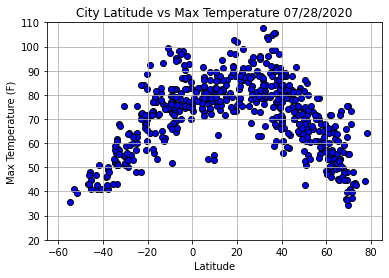

In [12]:
# create a Scatter Plot for temperature vs latitude
plt.scatter(lats, maxtemp, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {plot_date}")
plt.xlim(-65,85) # set the upper and lower limits of our x axis
plt.ylim(20,110) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Temperature.png")
plt.show()

In [13]:
# Analysis of City Latitude vs Max Temperature:
# The chart above shows that cities closer to the equator - nearest to Latitude 0 - 
# generally have a higher maximum temperature. At the time this data was collected, 
# the northern hemisphere was in its summer season, resulting in the peak temperatures
# being shifted to approximately 20 degrees North Latitude. If the data was collected 
# on the first day of Spring or Autumn, we would expect the temperature data points
# to appear symetrical around the zero degree latitude line.

## Latitude vs. Humidity Plot

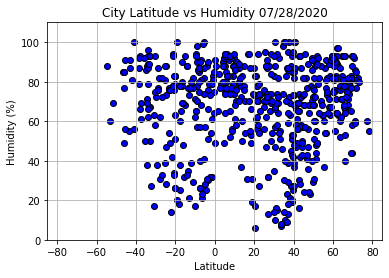

In [14]:
# create a Scatter Plot for humidity vs latitude
plt.scatter(lats, hum, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity {plot_date}")
plt.xlim(-85,85) # set the upper and lower limits of our x axis
plt.ylim(0,110) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Humidity.png")
plt.show()

In [15]:
# Analysis of City Latitude vs Humidity:
# The chart above shows a fairly consistant distribution of humidity levels across
# all latutudes from -60 to 80. It also indicates that a high percentage of cities 
# have humidity levels in the 60% to 100% band.

## Latitude vs. Cloudiness Plot

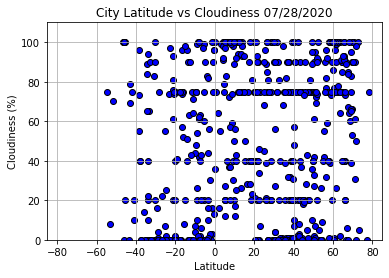

In [16]:
# create a Scatter Plot for cloudiness vs latitude
plt.scatter(lats, clouds, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness {plot_date}")
plt.xlim(-85,85) # set the upper and lower limits of our x axis
plt.ylim(0,110) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Cloudiness.png")
plt.show()

In [17]:
# Analysis of City Latitude vs Cloudiness:
# The chart above shows a fairly even distribution of cloud cover levels across
# all latutudes from -60 to 80. As seen by the horizontal banding on the chart, 
# it is evident that some popular cloud cover reporting thresholds are 0%, 20%, 
# 40%, 75%, 90%, and 100%

## Latitude vs. Wind Speed Plot

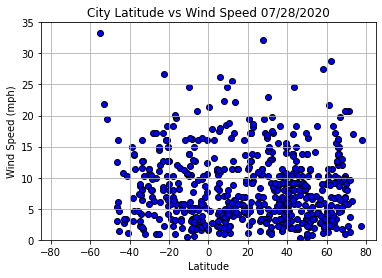

In [18]:
# create a Scatter Plot for wind speed vs latitude
plt.scatter(lats, wind, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed {plot_date}")
plt.xlim(-85,85) # set the upper and lower limits of our x axis
plt.ylim(0,35) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Wind_Speed.png")
plt.show()

In [19]:
# Analysis: The chart above shows that wind speeds at each velocity are
# evenly distribution across most latutudes from -60 to 80. It also 
# shows that the majority of locations have wind speeds below 10 mph,
# and very few locations are above a 20 mph wind speed.

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots

In [21]:
# Create Northern and Southern Hemisphere DataFrames

In [22]:
north_data = clean_city_data[clean_city_data['Lat']>=0]
north_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Kumul,42.80,93.45,79.11,30,0,10.80,CN,1595953854
1,Thompson,55.74,-97.86,60.80,87,90,5.82,CA,1595953746
2,Kalmar,56.66,16.36,69.80,77,77,5.82,SE,1595953858
4,Marawi,8.00,124.29,73.99,92,100,7.00,PH,1595953858
5,Lāsalgaon,20.15,74.23,75.97,87,100,11.34,IN,1595953858


In [23]:
south_data = clean_city_data[clean_city_data['Lat']<0]
south_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
3,Victoria Point,-27.58,153.30,55.00,62,0,4.00,AU,1595953858
8,Te Anau,-45.42,167.72,41.04,91,100,1.43,NZ,1595953858
10,Comodoro Rivadavia,-45.87,-67.50,48.20,49,0,16.11,AR,1595953859
13,Ancud,-41.87,-73.82,51.01,81,75,3.36,CL,1595953859
14,Cape Town,-33.93,18.42,57.99,62,20,16.11,ZA,1595953859


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.6507


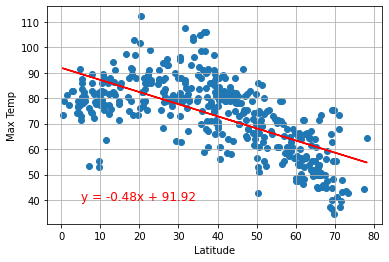

In [24]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Max_Temp']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()
plt.savefig("output_data/Northern Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.8212


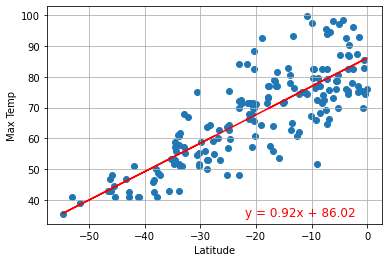

In [25]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Max_Temp']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()
plt.savefig("output_data/Southern Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [26]:
# Analysis for Max Temp vs. Latitude Linear Regression: 
# The two charts above show that the Max Temp increases as latitude readings
# approach 0 latitude. Also clearly visible are the lower temperatures
# in the southern hemisphere, currently in the Winter season, when compared
# to the Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.0113


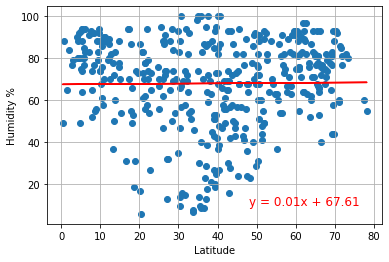

In [27]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Humidity']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig("output_data/Northern Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.1379


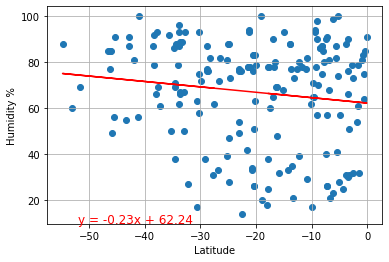

In [28]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Humidity']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig("output_data/Southern Humidity vs. Latitude Linear Regression.png")
plt.show()

In [29]:
# Analysis for Humidity vs. Latitude Linear Regression: 
# The two charts above show different results for the Northern vs. Southern
# Hemispheres. The trendline for the northern chart shows a steady 68% humidity
# across all latitudes, while the trendline on the southern chart shows 62% 
# average humidity at the equator increasing steadily to around 77% at latitude
# -55 degrees. It should be noted that the R-squred value is very low fow both 
# of these charts, indicating that humidity levels vary greatly between cities.
# Also, perhaps the difference between the summer and winter seasons in the 
# hemisphere is the cause of the different trend lines.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.0161


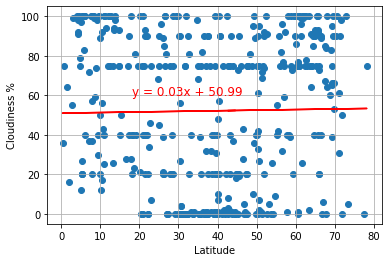

In [31]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Cloudiness']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig("output_data/Northern Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.0107


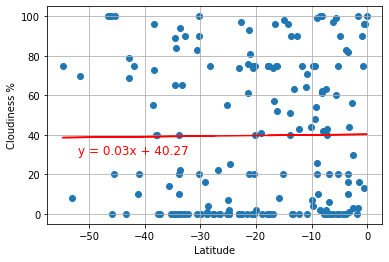

In [32]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Cloudiness']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig("output_data/Southern Cloudiness vs. Latitude Linear Regression.png")
plt.show()

In [33]:
# Analysis for Cloudiness vs. Latitude Linear Regression: 
# The two charts above show dissimilar results for the Northern vs. Southern
# Hemispheres. The trendlines for the northern and southern chart show average 
# cloud covers of about 52% and 40% respectively. The corelation value is low
# for both graphs, indicating a great range in cloud cover values. The 
# lower average value in the southern hemisphere is perhaps a result of the 
# lower percentage of land to ocean area when compared to the northern hemisphere,
# since land masses generate cloud formation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.0336


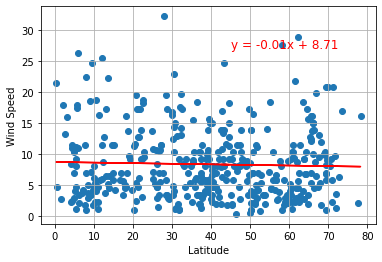

In [34]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Wind_Speed']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,27),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("output_data/Northern wind Speed vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.1484


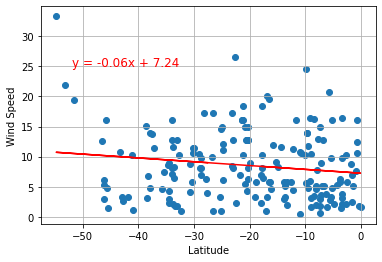

In [35]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Wind_Speed']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,25),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("output_data/Southern wind Speed vs. Latitude Linear Regression.png")
plt.show()

In [36]:
# Analysis for Wind Speed vs. Latitude Linear Regression: 
# The two charts above show slightly different results between the Northern vs. 
# Southern Hemispheres. The trendline for the northern hemispere shows a consistant
# wind speed of about 7-8 mph acroos all latitudes. The southern hemispere shows a 
# sloping trendline reanginge from 7 mph at the equator to 11 mph at -55 degrees
# latitude. The corelation value is low for both graphs, indicating a great range
# in wind speed between cities.

In [37]:
# The End